# 7 - Velocities

Loads adjusted data and then runs various plots for velocities, mean currents, and residual flows.

## Imports

Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as pldates
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
for i in range(2):
    %matplotlib notebook

In [62]:
# import data

adcp = 'Axis55'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2018
ds_in = xr.open_dataset(f'../Data/data/adj/adj_{adcp}_{year}_0.nc')

n_seg = ds_in.n_seg
if n_seg > 1:
    ds = [ds_in]
    for i in range(n_seg):
        if i > 0:
            ds_temp = xr.open_dataset(f'../Data/data/adj/adj_{adcp}_{year}_{i}.nc')
            ds.append(ds_temp)
elif n_seg == 1:
    ds = [ds_in]
    
#print(ds)

In [63]:
# extract plotting variables

t_stamp = ds[0].t_stamp
depth = ds[0].depth.values
start_date = ds[0].start_date
end_date = ds[0].end_date

## Adjusted

<IPython.core.display.Javascript object>


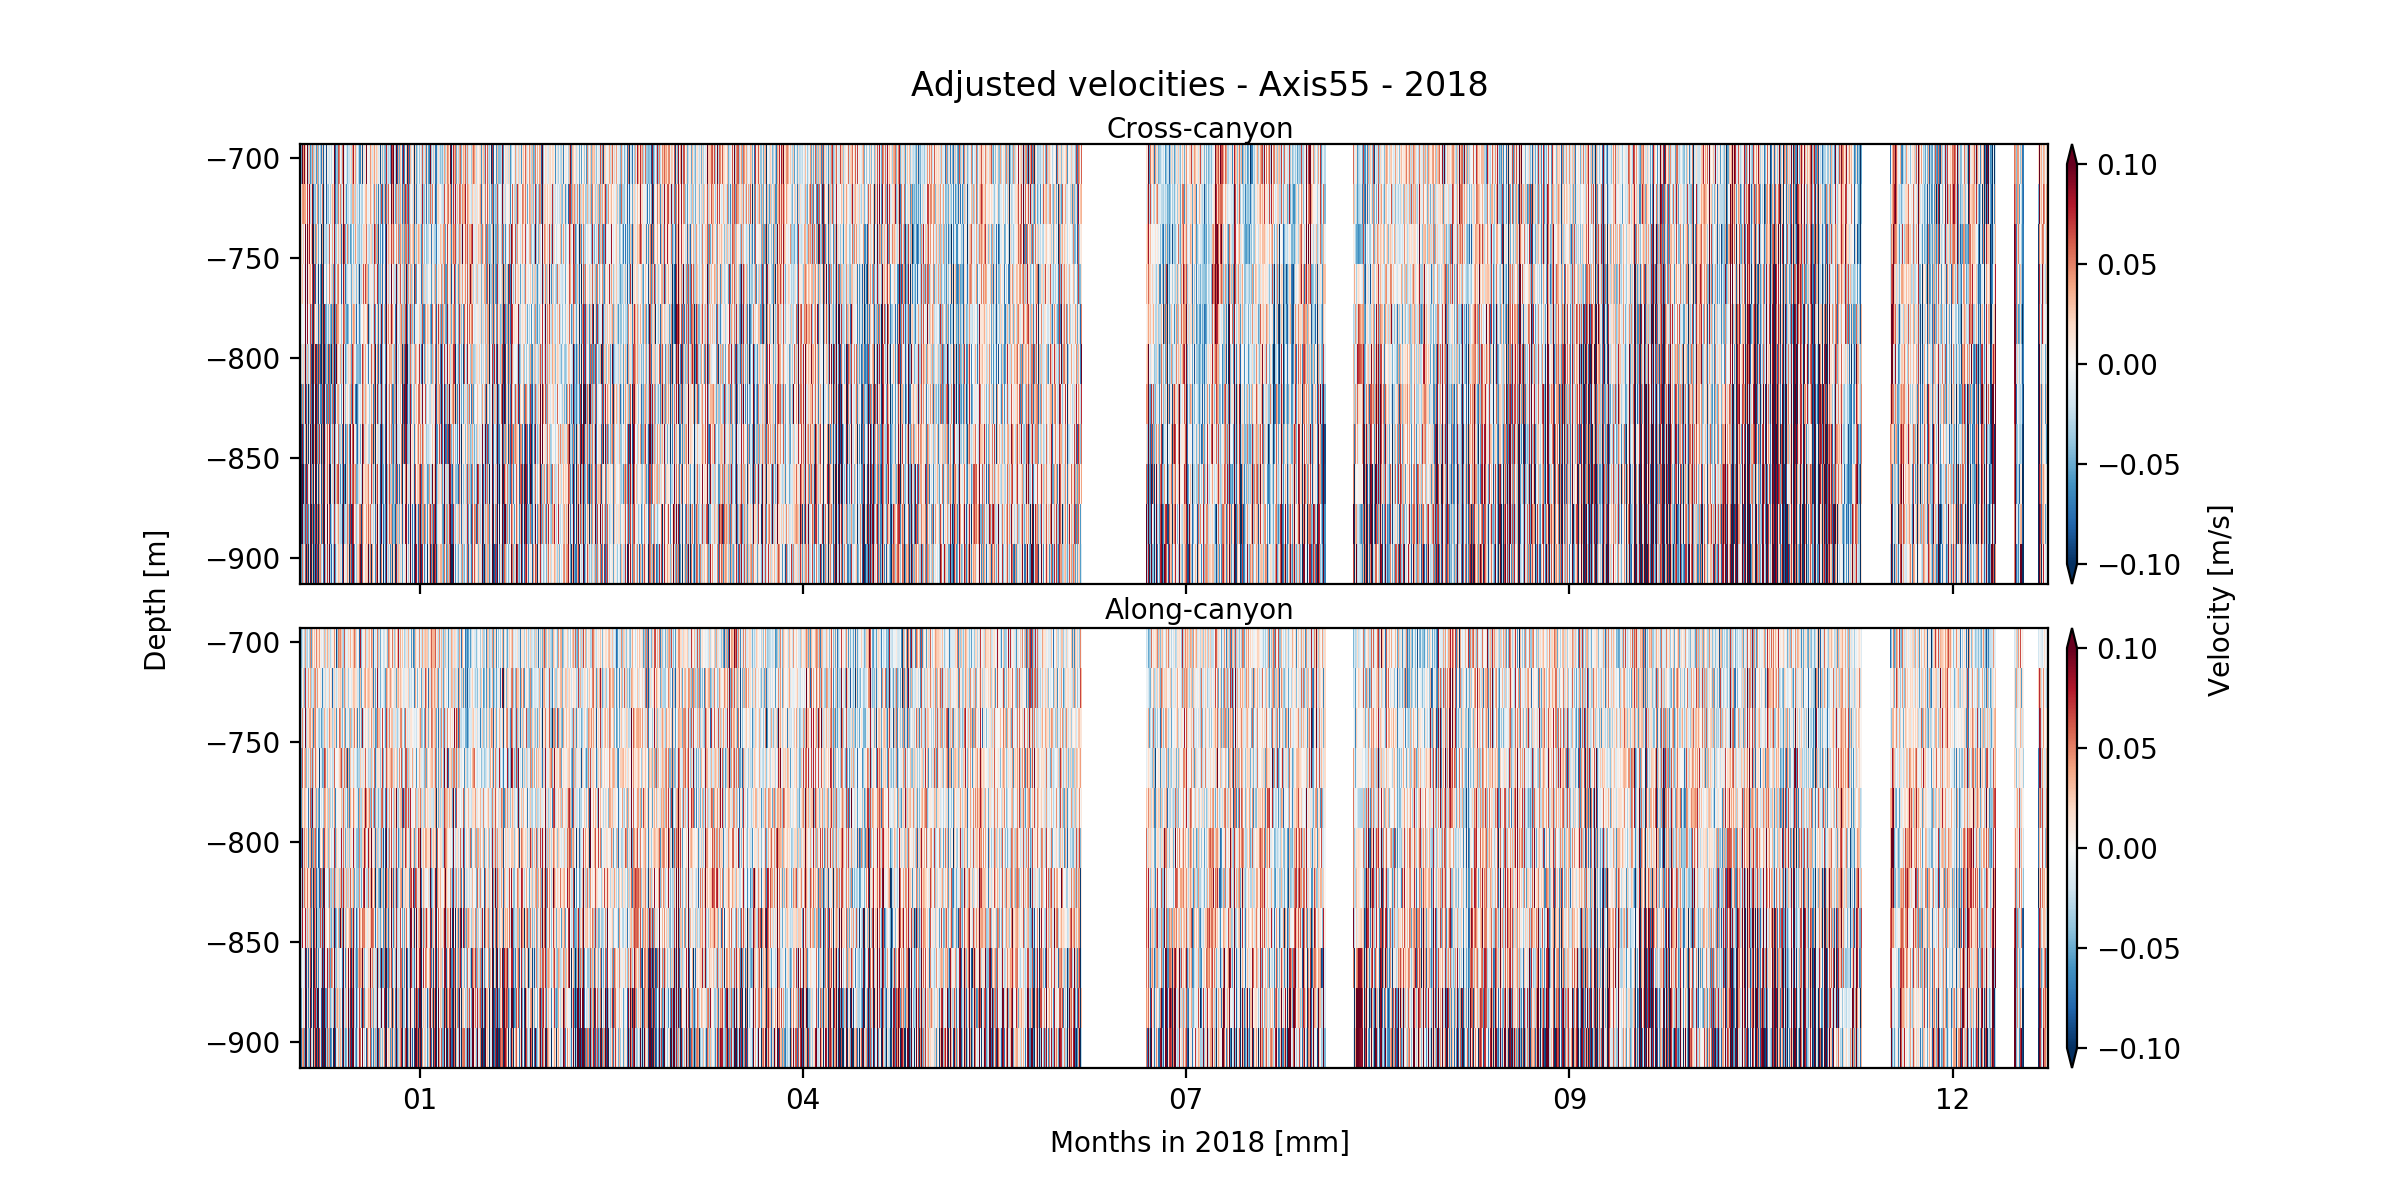

In [64]:
# plot adjusted velocity data

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,6), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.92, f'Adjusted velocities - {adcp} - {t_stamp}', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'Depth [m]', va='center', rotation='vertical')
fig.text(0.92, 0.5, 'Velocity [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.04, f'Months in {t_stamp} [mm]', ha='center')

if adcp == 'Slope':
    vmin = -0.2
    vmax = 0.2
    fig.text(0.5, 0.885, 'Cross-slope', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-slope', ha='center', fontsize=10)
elif adcp == 'Axis55' or adcp == 'Axis75':
    vmin = -0.1
    vmax = 0.1
    fig.text(0.5, 0.885, 'Cross-canyon', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-canyon', ha='center', fontsize=10)

for i in range(n_seg):
    im0 = ax0.pcolormesh(ds[i].t_seg, -depth, ds[i].uorig.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    im1 = ax1.pcolormesh(ds[i].t_seg, -depth, ds[i].vorig.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
    
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

plt.show()

plt.savefig(fname=f'./plots/vel_plots/vel_{adcp}_{t_stamp}.pdf',format='pdf')

<IPython.core.display.Javascript object>


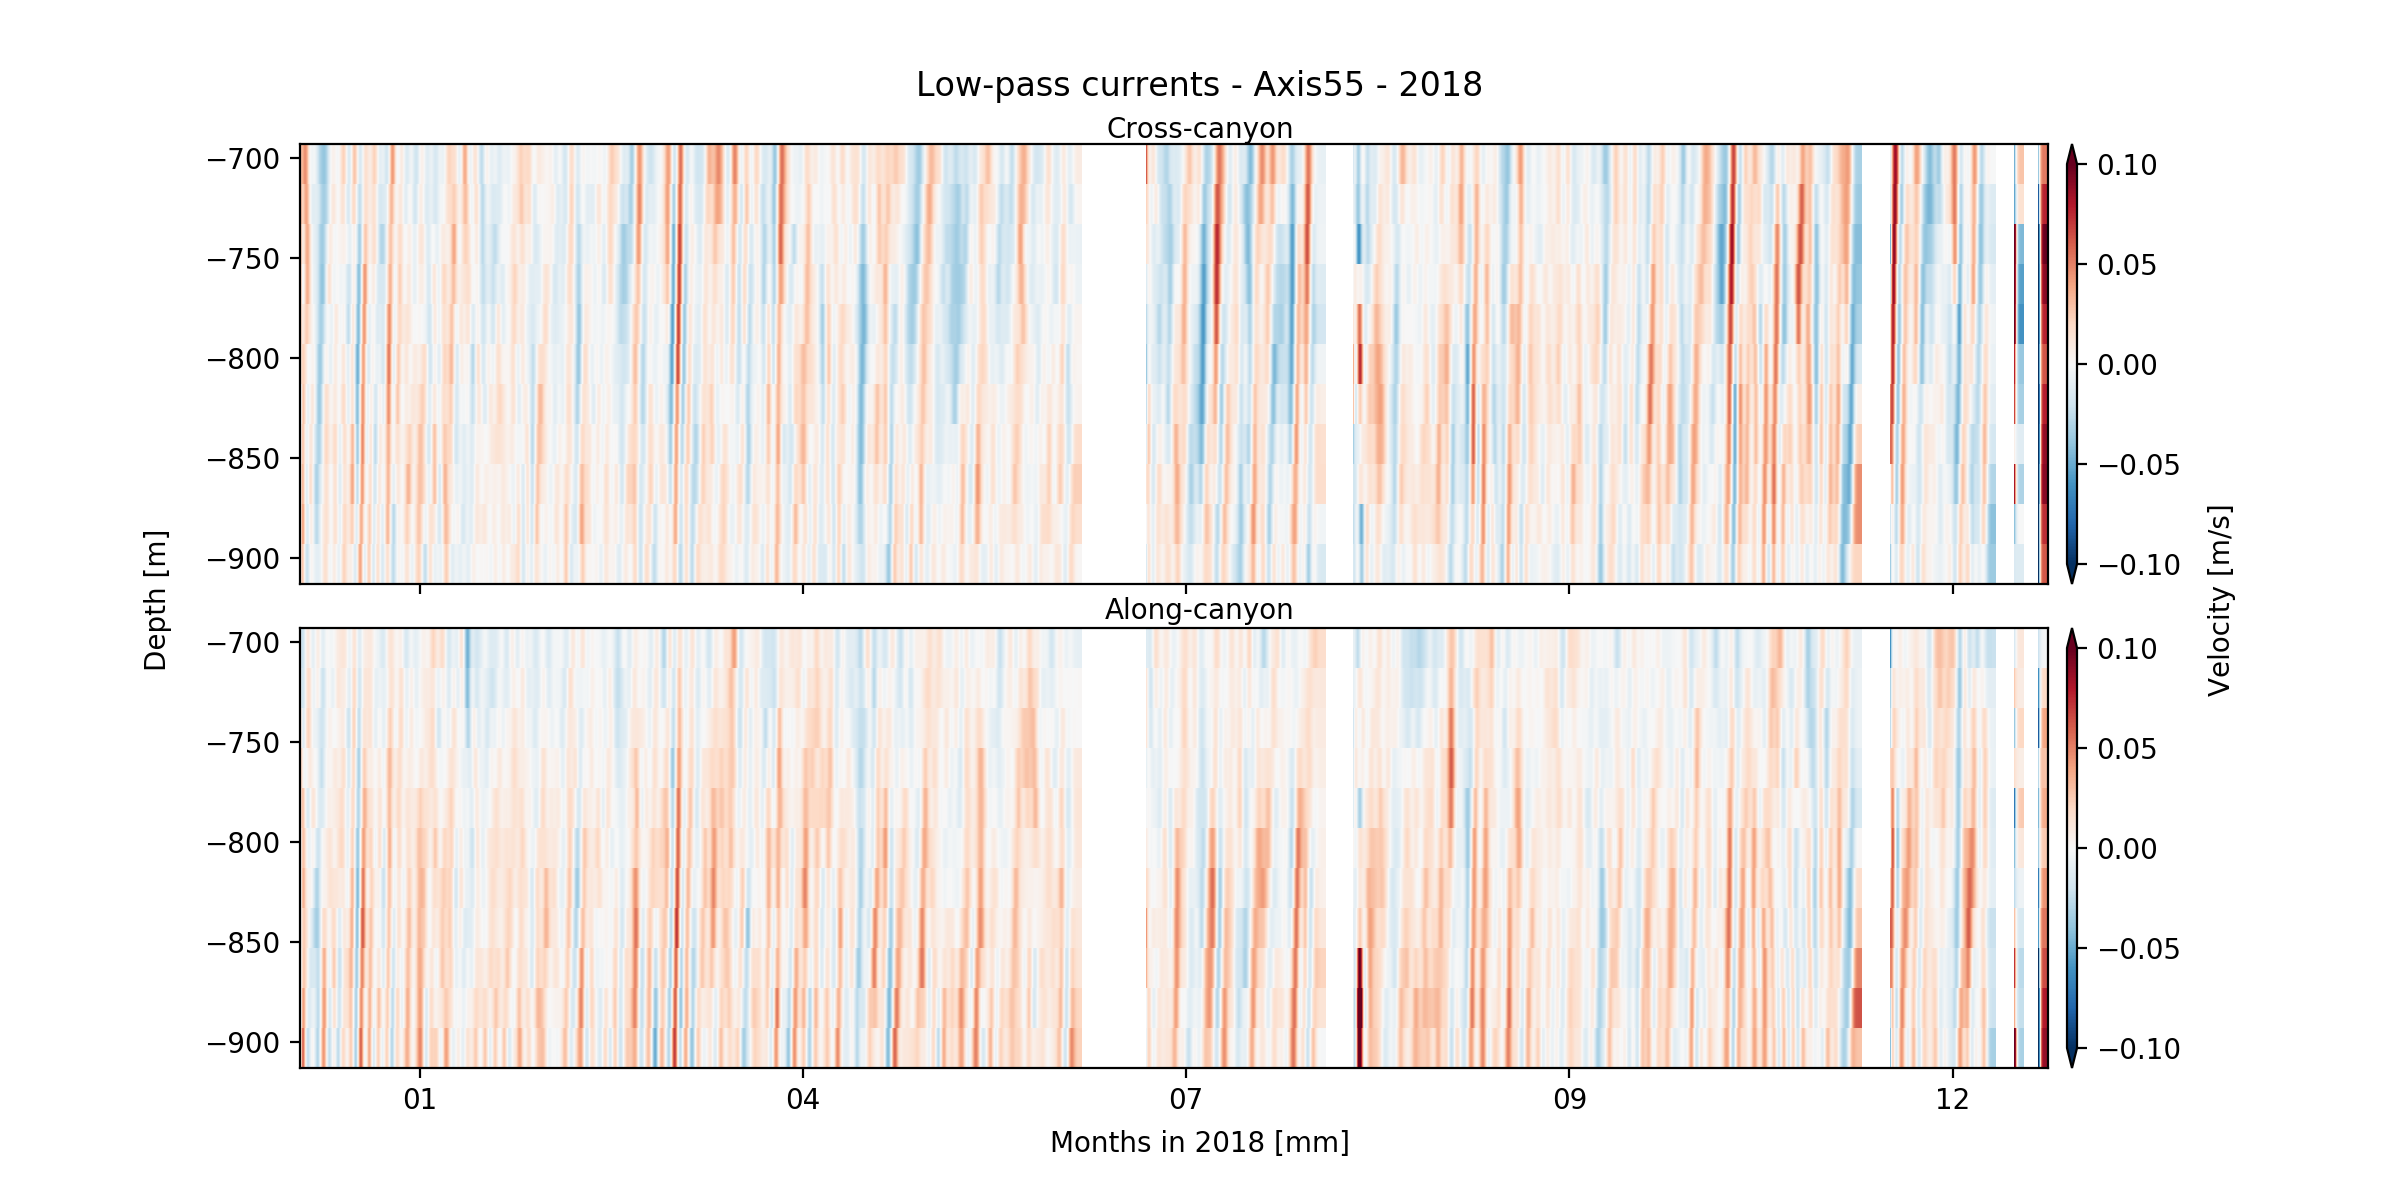

In [65]:
# plot mean current data

fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,6), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.92, f'Low-pass currents - {adcp} - {t_stamp}', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'Depth [m]', va='center', rotation='vertical')
fig.text(0.92, 0.5, 'Velocity [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.04, f'Months in {t_stamp} [mm]', ha='center')

if adcp == 'Slope':
    vmin = -0.2
    vmax = 0.2
    fig.text(0.5, 0.885, 'Cross-slope', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-slope', ha='center', fontsize=10)
elif adcp == 'Axis55' or adcp == 'Axis75':
    vmin = -0.1
    vmax = 0.1
    fig.text(0.5, 0.885, 'Cross-canyon', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-canyon', ha='center', fontsize=10)

for i in range(n_seg):
    im0 = ax0.pcolormesh(ds[i].t_seg, -depth, ds[i].ulp.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    im1 = ax1.pcolormesh(ds[i].t_seg, -depth, ds[i].vlp.T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
    
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

plt.show()

plt.savefig(fname=f'./plots/vel_plots/lp_{adcp}_{t_stamp}.pdf',format='pdf')

<IPython.core.display.Javascript object>


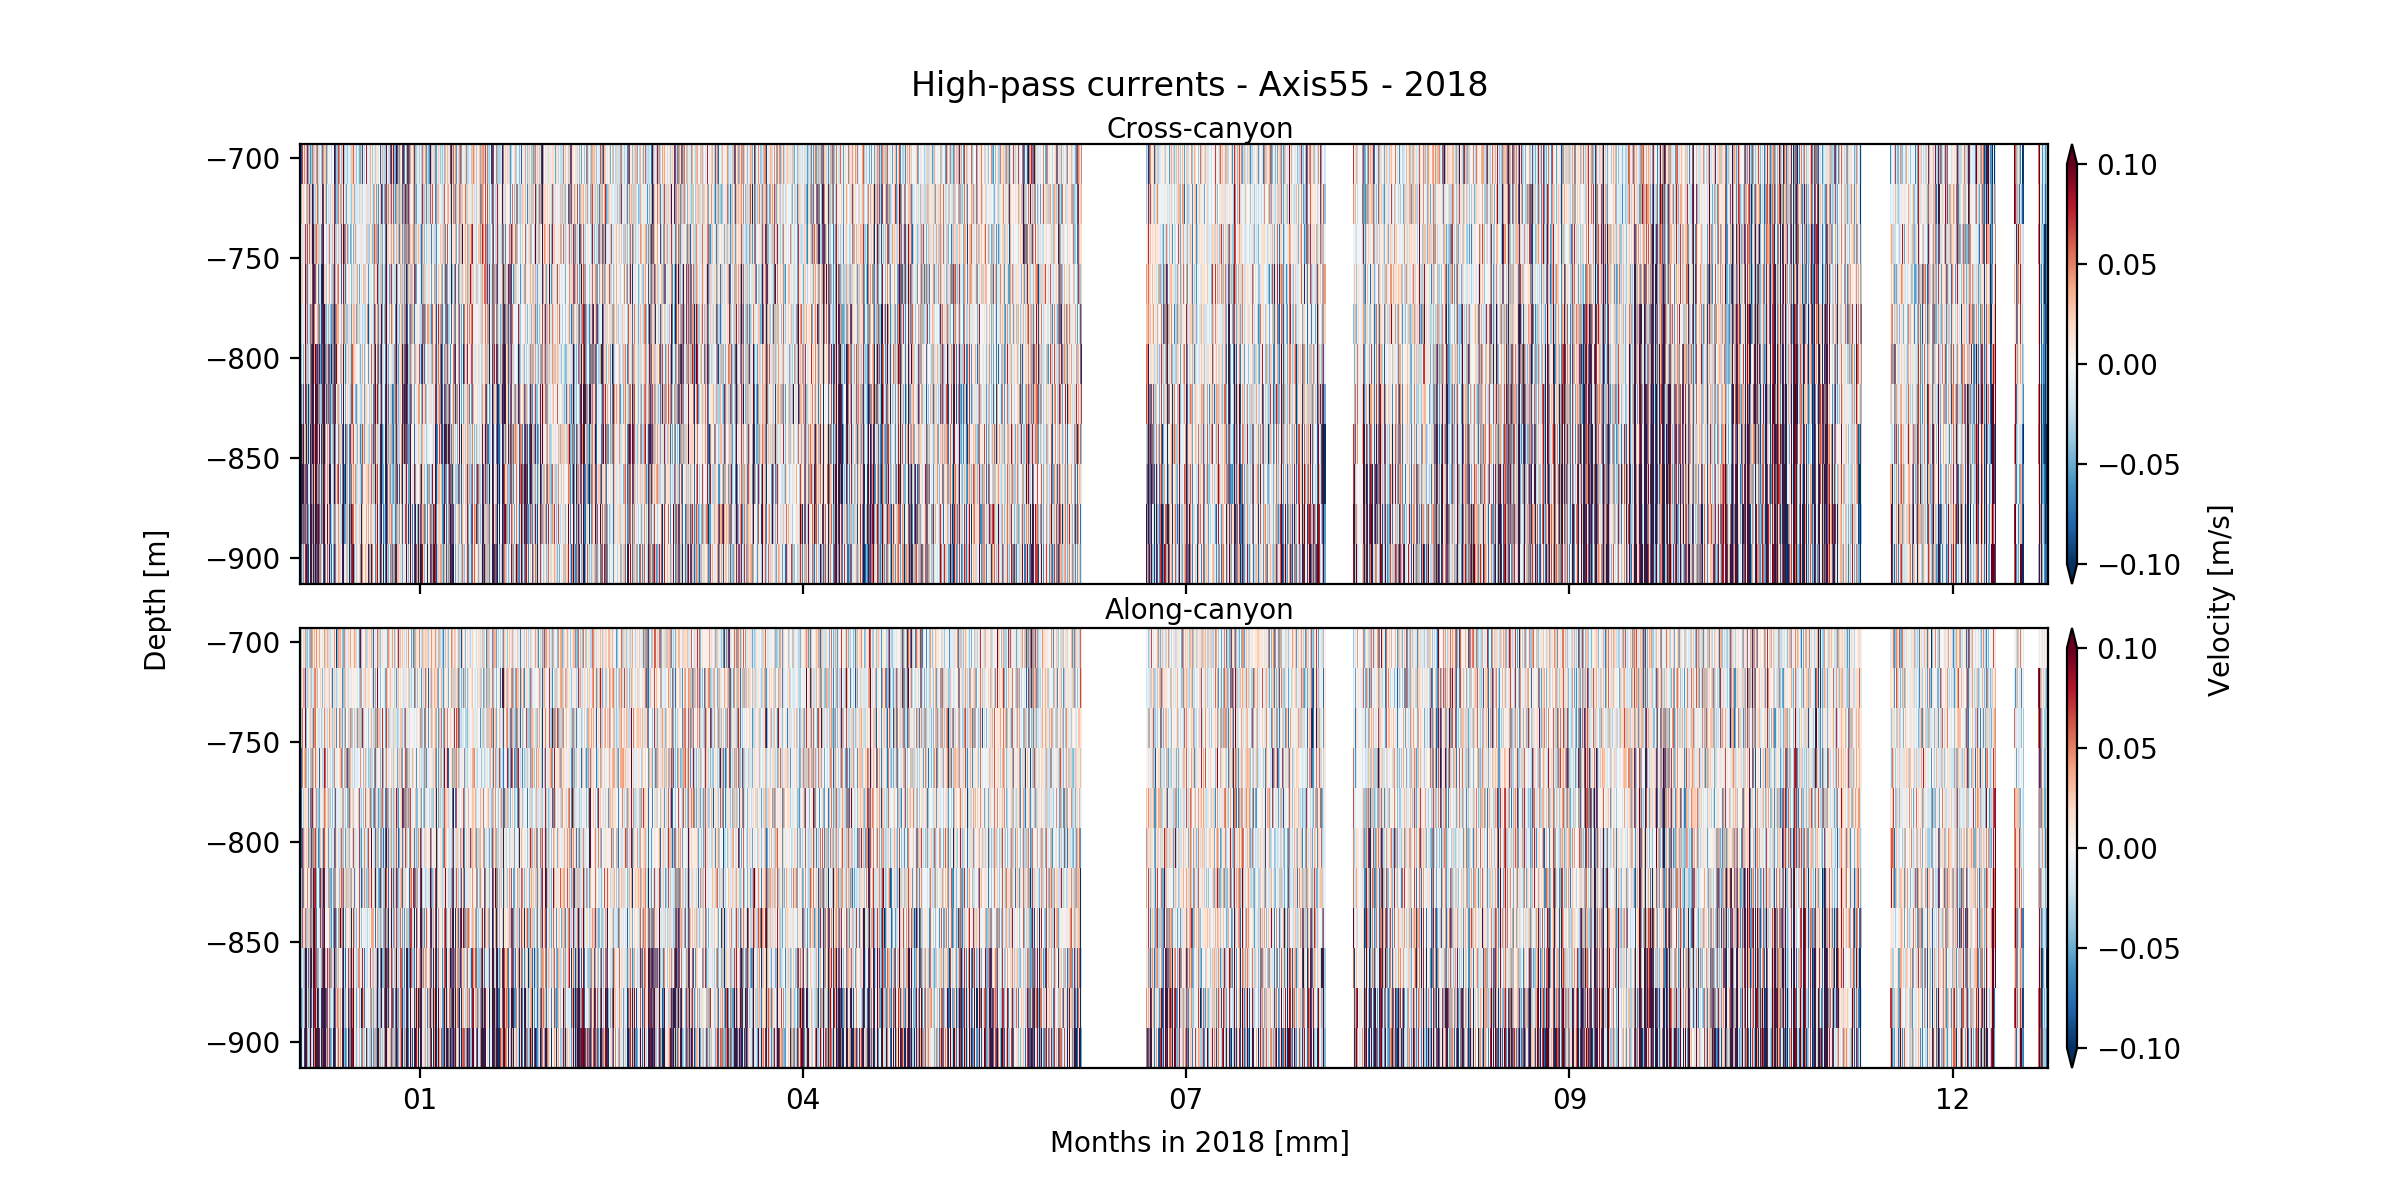

In [66]:
# plot residual flow data

# get residual flow data

uhp,vhp = [],[]
for i in range(n_seg):
    uhp_seg = ds[i].uorig - ds[i].ulp
    uhp.append(uhp_seg)
    vhp_seg = ds[i].vorig - ds[i].vlp
    vhp.append(vhp_seg)

# plot
    
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(12,6), sharex = True, sharey = True)
fig.subplots_adjust(hspace = 0.1)
fig.text(0.5, 0.92, f'High-pass currents - {adcp} - {t_stamp}', ha='center', fontsize=12)
fig.text(0.06, 0.5, 'Depth [m]', va='center', rotation='vertical')
fig.text(0.92, 0.5, 'Velocity [m/s]', va='center', rotation='vertical')
fig.text(0.5, 0.04, f'Months in {t_stamp} [mm]', ha='center')

if adcp == 'Slope':
    vmin = -0.2
    vmax = 0.2
    fig.text(0.5, 0.885, 'Cross-slope', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-slope', ha='center', fontsize=10)
elif adcp == 'Axis55' or adcp == 'Axis75':
    vmin = -0.1
    vmax = 0.1
    fig.text(0.5, 0.885, 'Cross-canyon', ha='center', fontsize=10)
    fig.text(0.5, 0.484, 'Along-canyon', ha='center', fontsize=10)

for i in range(n_seg):
    im0 = ax0.pcolormesh(ds[i].t_seg, -depth, uhp[i].T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)
    im1 = ax1.pcolormesh(ds[i].t_seg, -depth, vhp[i].T, rasterized=True, cmap='RdBu_r', vmin=vmin, vmax=vmax)

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=40, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=40, extend='both')
    
date_form = pldates.DateFormatter("%m")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_xlim(start_date,end_date)
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

plt.show()

plt.savefig(fname=f'./plots/vel_plots/hp_{adcp}_{t_stamp}.pdf',format='pdf')